In [308]:
import requests
from bs4 import BeautifulSoup
import re
from time import sleep
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [287]:
def get_urls(year_start=2015, year_end=2020):
    
    list_news = []
    URL='https://nplus1.ru'
    
    years_news = [(URL + '/news/' + str(year)) for year in range(year_start,year_end)]
    
    for year in years_news:
        
        page = requests.get(year)
        soup = BeautifulSoup(page.text, 'lxml')
        
        news = soup.find_all('article')
        for url in range(0, len(news)):
            u = news[url].find_all('a')
            list_news.extend([URL + link['href'] for link in u])
        
    return list_news

In [288]:
def get_text(html):
    text = " ".join([t.text for t in html.find_all('p', {'class': None})])
    text = text.replace('\n', ' ')
    text = text.replace('\xa0', ' ')

    return text.split('Нашли опечатку?')[0]

In [289]:
def get_news(URL):
    
    page = requests.get(URL)
    soup = BeautifulSoup(page.text, 'lxml')
    
    topic = [rubrick.text for rubrick in soup.find_all('p')[0].find_all('a')]
    diff = soup.find_all('span', {'class' : 'difficult-value'})[0].text
    author = soup.find_all('meta', {'name': 'author'})[0].attrs['content']
    date = soup.find_all('meta', {'itemprop': 'datePublished'})[0].attrs['content']
    title = soup.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    link = soup.find_all('meta', {'property' : 'og:url'})[0].attrs['content']
    text = get_text(soup)
    
    return link, date, title, author, topic, diff, text

In [290]:
def get_dataframe():
    
    urls = get_urls()
    news = []
    
    for u in urls:
        new = get_news(u)
        news.append(new)
        sleep(3)
        
    df = pd.DataFrame(news)
    df.columns = ['link', 'date', 'title', 'author', 'topic', 'diffc', 'text']
    df['diffc'] = [float(i) for i in df.diffc]
    
    return df

In [291]:
df = get_dataframe()
df.to_csv('news')
df

,link,date,title,author,topic,diffc,text
0,https://nplus1.ru/news/2015/12/30/spin-wave-cu...,2015-12-30,Антиферромагнетикам нашли применение в спинтро...,Владимир Королев,[Наука],8.2,Физики из Института физико-химических исследов...
1,https://nplus1.ru/news/2015/12/30/samsung-gimmick,2015-12-30,Samsung покажет на CES сразу три новых гаджета,Николай Воронцов,"[Гаджеты, Технологии]",1.3,Компания Samsung Electronics намерена представ...
2,https://nplus1.ru/news/2015/12/30/Terrible-ars...,2015-12-30,В Подмосковье нашли арсенал времен Ивана Грозного,Екатерина Русакова,"[Наука, Археология]",1.1,Экспедиция института археологии РАН обнаружила...
3,https://nplus1.ru/news/2015/12/30/moralgod,2015-12-30,Палестинцы оценили жизнь израильтян «с точки з...,Роман Фишман,[],3.3,Религиозность часто рассматривают как один из ...
4,https://nplus1.ru/news/2015/12/30/bad-eating,2015-12-30,Доказан негативный эффект еды на сытый желудок,Александра Стуккей,[Наука],1.7,Аспирант Иллинойского университета Дэвид Гал (...
5,https://nplus1.ru/news/2015/12/30/thermophoto-...,2015-12-30,Получена первая термальная фотография единично...,Владимир Королев,"[Наука, Технологии]",3.8,Физики из Университета Бордо (Франция) впервые...
6,https://nplus1.ru/news/2015/12/30/Iron-age-set...,2015-12-30,Норвежские археологи нашли поселение железного...,Екатерина Русакова,"[Наука, Археология]",1.2,Норвежские археологи нашли на полуострове Орла...
7,https://nplus1.ru/news/2015/12/30/derby-legs,2015-12-30,3D-печать помогла улучшить протезы для хаски,Николай Воронцов,"[Технологии, 3D-печать]",2.2,"Американская компания 3D Systems, специализиру..."
8,https://nplus1.ru/news/2015/12/30/sonar-glove,2015-12-30,Японцы сделали перчатку-сонар,Николай Воронцов,"[Гаджеты, Сделай сам]",1.3,Исследователи из Цукубского университета разра...
9,https://nplus1.ru/news/2015/12/30/uav,2015-12-30,Армия США списала свой первый беспилотник,Василий Сычев,[Оружие],2.1,Командование Армии США списало разведывательны...


In [368]:
authors = df.groupby('author', as_index=False)['link'].count()
authors.rename(columns={'link' : 'page_count'}, inplace=True)
authors.sort_values(by = 'page_count', ascending=False, inplace=True)

Text(0.5, 1.0, 'Page count by Author')

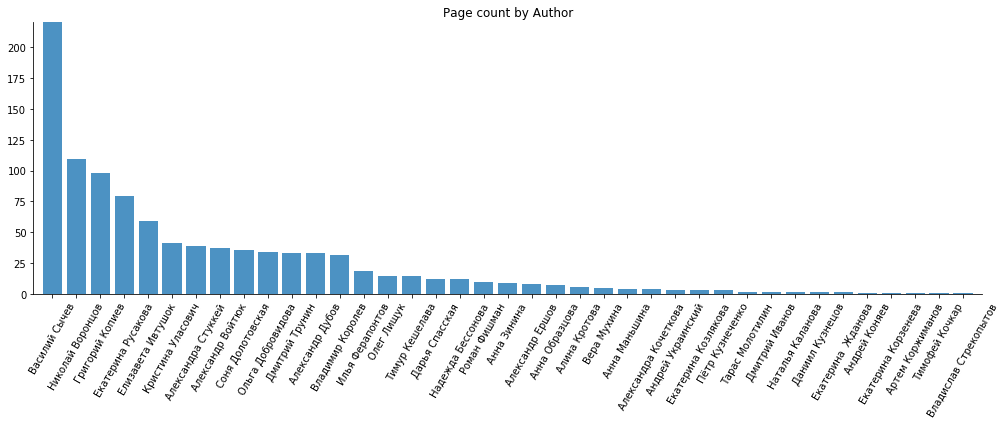

In [411]:
fig, ax = plt.subplots(figsize=(17, 5))
ax.bar(authors['author'], authors['page_count'], alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(0.01, 0)
plt.xticks(rotation=60)
plt.title('Page count by Author')